# Week #11 Morphology

In [ ]:
import cv2
import numpy as np
from matplotlib import pyplot as plt
from skimage.morphology import skeletonize, thin

In [ ]:
!wget https://drive.google.com/uc?id=1H3sk8nqoePFTDQd0e1CqBQ3_GvfYFXpM -O bacteria.png
!wget https://drive.google.com/uc?id=1jIqJPFJcsM9z8xW0LBq4CfzQYHs8gG3C -O 4objects.png
!wget https://drive.google.com/uc?id=1nB9nQwdbyYmi60oOYd0lFIByQEzdmk7o -O 5objects.png
!wget https://drive.google.com/uc?id=1jhxsYkgtJdqb3JVW6ZBU-C-qMTtN4-r3 -O circuitbw.png
!wget https://drive.google.com/uc?id=1bIgSDhVYe99PLeZyluqN8gu0mT3A1pO4 -O nickel.png
!wget https://drive.google.com/uc?id=1jpDUn1oYDPl9o2eOBtQR5YLdlpmkk3a9 -O P_noise1.png
!wget https://drive.google.com/uc?id=18I8Jjsf8prOG-8N8uWDo8U8LxGMi59yG -O P_noise2.png
!wget https://drive.google.com/uc?id=1O0qYuGzJ-DCfyYYyEQfmp0cEA-WmYTnL -O P.png
!wget https://drive.google.com/uc?id=1boOxheCOGGceulh7cXj0aphRG2fb1dYU -O fingerprint.jpeg
!wget https://drive.google.com/uc?id=1KSPV-8X8HtNHfFF4RlT_t_hn5Trfl6K4 -O coins.jpg


--2023-10-18 07:19:47--  https://drive.google.com/uc?id=1H3sk8nqoePFTDQd0e1CqBQ3_GvfYFXpM
Resolving drive.google.com (drive.google.com)... 142.250.98.113, 142.250.98.102, 142.250.98.100, ...
Connecting to drive.google.com (drive.google.com)|142.250.98.113|:443... connected.
HTTP request sent, awaiting response... 303 See Other
Location: https://doc-04-2o-docs.googleusercontent.com/docs/securesc/ha0ro937gcuc7l7deffksulhg5h7mbp1/pflsuspl7jd0odqlhsc54pji8ris2e0o/1697613525000/10800959494545164832/*/1H3sk8nqoePFTDQd0e1CqBQ3_GvfYFXpM?uuid=de64a524-fad8-4c1b-aa71-cc97f38007df [following]
--2023-10-18 07:19:47--  https://doc-04-2o-docs.googleusercontent.com/docs/securesc/ha0ro937gcuc7l7deffksulhg5h7mbp1/pflsuspl7jd0odqlhsc54pji8ris2e0o/1697613525000/10800959494545164832/*/1H3sk8nqoePFTDQd0e1CqBQ3_GvfYFXpM?uuid=de64a524-fad8-4c1b-aa71-cc97f38007df
Resolving doc-04-2o-docs.googleusercontent.com (doc-04-2o-docs.googleusercontent.com)... 173.194.215.132, 2607:f8b0:400c:c0c::84
Connecting to doc-0

## 1) opening/closing
* Other structural elements - https://docs.opencv.org/4.x/d9/d61/tutorial_py_morphological_ops.html

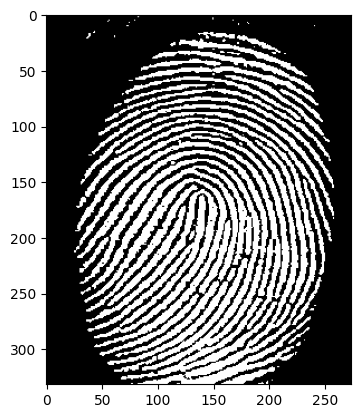

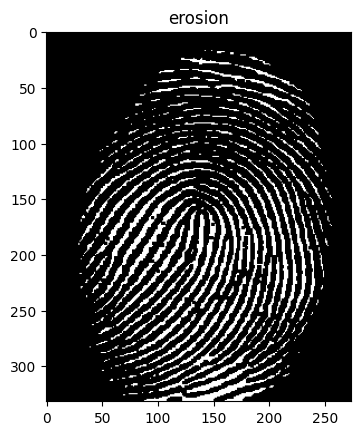

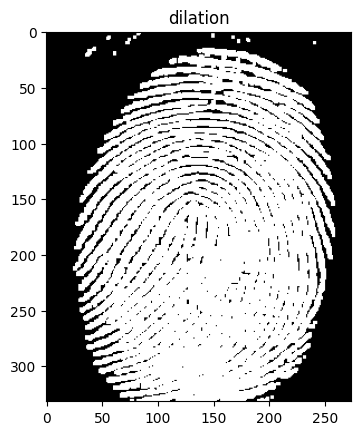

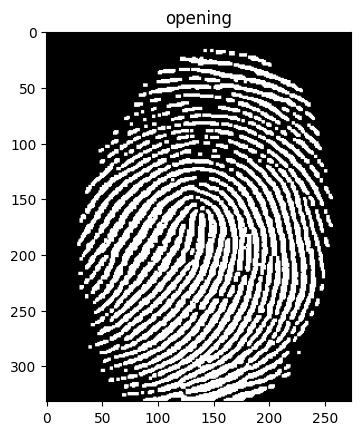

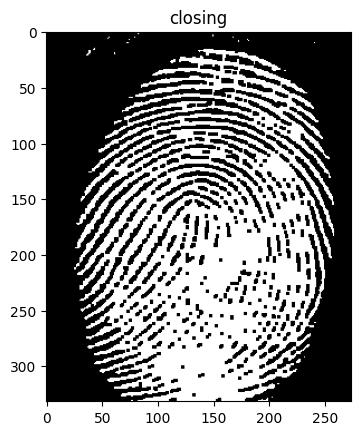

In [ ]:

img = cv2.imread('fingerprint.jpeg',0)
# create a binary -> threholding
th, img = cv2.threshold(img, 100, 255, cv2.THRESH_BINARY_INV)


plt.imshow(img, cmap='gray')
plt.show()

# design the structural element
kernel = np.ones((3,3),np.uint8)
# kernel = np.array([[0,1,0],[1,1,1],[0,1,0]],np.uint8)


erosion = cv2.erode(img,kernel,iterations = 1)
dilation = cv2.dilate(img,kernel,iterations = 1)


plt.imshow(erosion,cmap='gray');plt.title("erosion")
plt.show()

plt.imshow(dilation,cmap='gray');plt.title("dilation")
plt.show()


closing = cv2.morphologyEx(img, cv2.MORPH_CLOSE, kernel)
opening = cv2.morphologyEx(img, cv2.MORPH_OPEN, kernel)


plt.imshow(opening,cmap='gray');plt.title("opening")
plt.show()

plt.imshow(closing,cmap='gray');plt.title("closing")
plt.show()

## Exercise #1 Improving the Ps

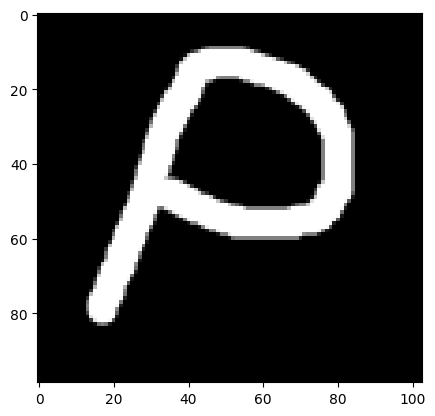

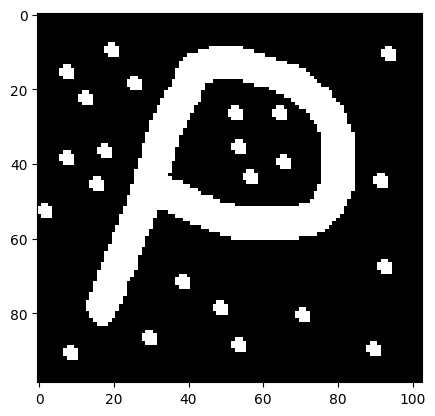

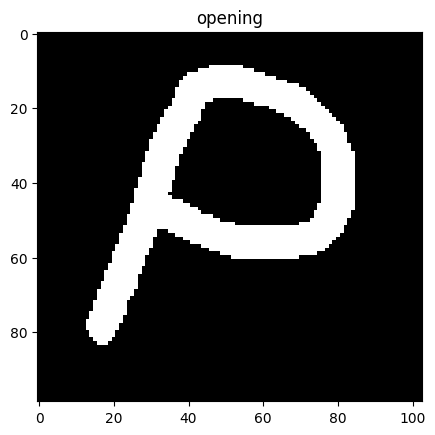

------------------------


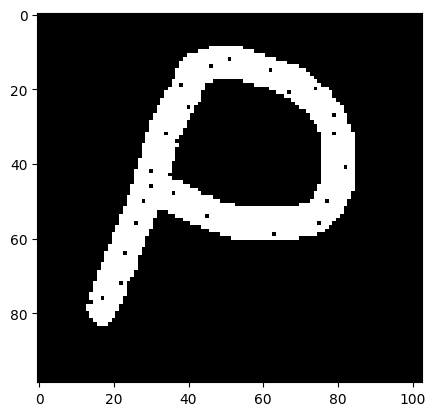

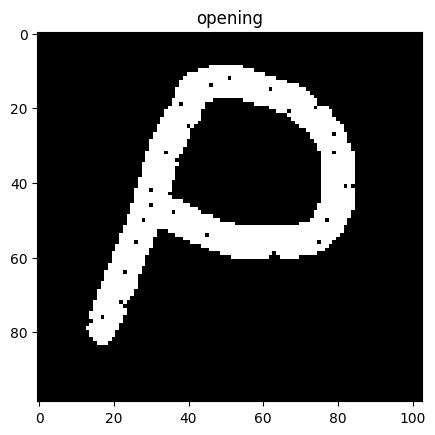

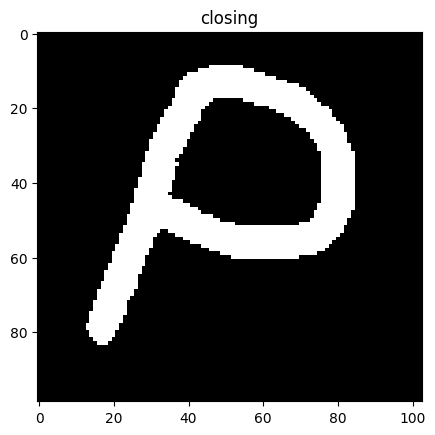

In [ ]:
img = cv2.imread('P.png',0)

img2 = cv2.imread('P_noise1.png',0)
th, img2 = cv2.threshold(img2, 100, 1, cv2.THRESH_BINARY)

img3 = cv2.imread('P_noise2.png',0)
th, img3 = cv2.threshold(img3, 100, 1, cv2.THRESH_BINARY)

plt.imshow(img,cmap='gray')
plt.show()
plt.imshow(img2,cmap='gray')
plt.show()


kernel = np.ones((3,3),np.uint8)
kernel = np.array([[0,1,0],[1,1,1],[0,1,0]],np.uint8)


closing = cv2.morphologyEx(img2, cv2.MORPH_CLOSE, kernel)
opening = cv2.morphologyEx(img2, cv2.MORPH_OPEN, kernel,iterations=2)


plt.imshow(opening,cmap='gray');plt.title("opening")
plt.show()

# plt.imshow(closing,cmap='gray');plt.title("closing")
# plt.show()

print('------------------------')

plt.imshow(img3,cmap='gray')
plt.show()

closing = cv2.morphologyEx(img3, cv2.MORPH_CLOSE, kernel)
opening = cv2.morphologyEx(img3, cv2.MORPH_OPEN, kernel)


plt.imshow(opening,cmap='gray');plt.title("opening")
plt.show()

plt.imshow(closing,cmap='gray');plt.title("closing")
plt.show()



## 2) Region filling
* https://docs.opencv.org/3.4/d7/d1b/group__imgproc__misc.html#ga366aae45a6c1289b341d140839f18717

In [ ]:
import cv2
import numpy as np
from matplotlib import pyplot as plt

# Read image
img = cv2.imread("zen.png",0)

# Threshold.
# Set values equal to or above 127 to 0. Set values below 127 to 255.
ret,thresh1 = cv2.threshold(img,127,255,cv2.THRESH_BINARY)

# Closing to connect edges
kernel = np.ones((5,5),np.uint8)
closing = cv2.morphologyEx(thresh1, cv2.MORPH_CLOSE, kernel)

# Copy the thresholded image.
im_floodfill = closing.copy()

# Mask used to flood filling.# Notice the size needs to be 2 pixels than the image.
h, w = closing.shape[:2]
mask = np.zeros((h+2, w+2), np.uint8)

# Floodfill from point (0, 0)
cv2.floodFill(im_floodfill, mask, (55,55), 255)


In [ ]:
import cv2
import numpy as np
from matplotlib import pyplot as plt

# Read image
img = cv2.imread("zen.png",0)

# Threshold.
# Set values equal to or above 127 to 0. Set values below 127 to 255.
ret,thresh1 = cv2.threshold(img,127,255,cv2.THRESH_BINARY)

# Closing to connect edges
kernel = np.ones((5,5),np.uint8)
closing = cv2.morphologyEx(thresh1, cv2.MORPH_CLOSE, kernel)

# Copy the thresholded image.
im_floodfill = closing.copy()

# Mask used to flood filling.# Notice the size needs to be 2 pixels than the image.
h, w = closing.shape[:2]
mask = np.zeros((h+2, w+2), np.uint8)

# Floodfill from point (0, 0)
 cv2.floodFill(im_floodfill, mask, (55,55), 255)



In [ ]:
# Read image
img = cv2.imread("nickel.png",0)

# Set values equal to or above 220 to 0. Set values below 220 to 255.
th, img_th = cv2.threshold(imimg_in, 220, 255, cv2.THRESH_BINARY_INV)

# Copy the thresholded image.
img_floodfill = img_th.copy()

# Mask used to flood filling.# Notice the size needs to be 2 pixels than the image.
h, w = img_th.shape[:2]
mask = np.zeros((h+2, w+2), np.uint8)

# Floodfill from point (0, 0)
cv2.floodFill(img_floodfill, mask, (0,0), 255)

# Invert floodfilled image
img_floodfill_inv = cv2.bitwise_not(img_floodfill)

# Combine the two images to get the foreground.
img_out = img_th | img_floodfill_inv

plt.imshow(img_out,cmap='gray')
plt.show()

## 3) How many object?

Connected component: https://docs.opencv.org/4.5.3/d3/dc0/group__imgproc__shape.html#gaedef8c7340499ca391d459122e51bef5

total number of object is  4
[[    0     0   205   209 36495]
 [  125    17    49    49  1889]
 [   58    52    36    36  1018]
 [   17   119    30    64  1518]
 [   96   134    51    48  1925]]


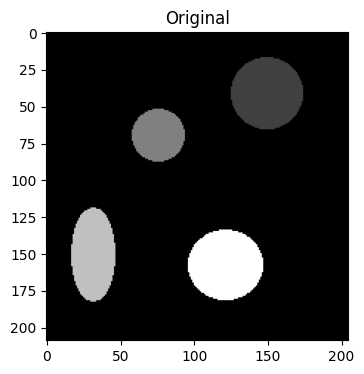

[[102.23373065 103.46230991]
 [149.02541027  41.02541027]
 [ 75.52455796  69.52455796]
 [ 31.51251647 150.52503294]
 [121.00831169 157.53402597]]


In [ ]:
img_rgb = cv2.imread("4objects.png")
img = cv2.cvtColor(img_rgb, cv2.COLOR_BGR2GRAY)

ret,thresh1 = cv2.threshold(img,127,255,cv2.THRESH_BINARY)

# You need to choose 4 or 8 for connectivity type
connectivity = 4

output = cv2.connectedComponentsWithStats(thresh1, connectivity, cv2.CV_32S)

# Get the results
# The first cell is the number of labels
num_labels = output[0]-1
# The second cell is the label matrix
labels = output[1]
# The third cell is the stat matrix
stats = output[2]
# The fourth cell is the centroid matrix
centroids = output[3]



fig = plt.figure(figsize=(12,4))
plt.subplot(121),plt.imshow(cv2.cvtColor(img_rgb, cv2.COLOR_BGR2RGB)),plt.title('Original')
# plt.xticks([]), plt.yticks([])
# label = 'labels = '+str(num_labels)
# plt.subplot(122),plt.imshow(output[1],cmap='gray'),plt.title(label)
# plt.xticks([]), plt.yticks([])
# plt.show()

print("total number of object is ", num_labels)
print(stats)

plt.imshow(labels,cmap='gray')
plt.show()
print(centroids)

## Exercise #2 Fill in the holes and count the number of the objects.

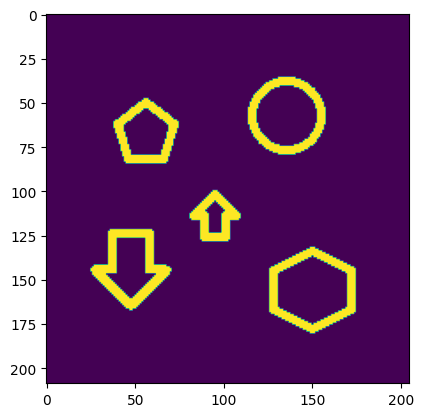

In [ ]:
img = cv2.imread("5objects.png",0)
plt.imshow(img)
plt.show()



## 4) Thining / Skeleton

In [ ]:
from skimage.morphology import skeletonize, thin

img= cv2.imread("circuitbw.png",0)
th, img = cv2.threshold(img,127,1,cv2.THRESH_BINARY)
skeleton = skeletonize(img)
thinned = thin(img)

plt.imshow(img)
plt.show()

plt.imshow(skeleton);plt.title("Skeleton")
plt.show()

plt.imshow(thinned);plt.title("thinned")
plt.show()

## MCV: How many bacteria in the image?

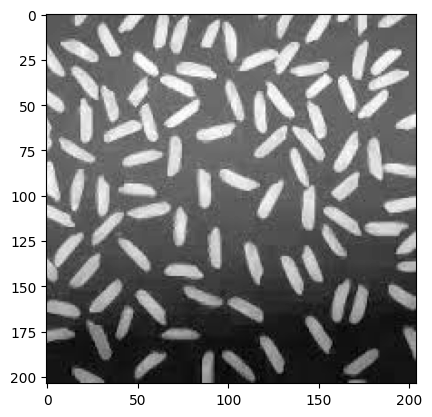

In [ ]:
img = cv2.imread("bacteria.png",0)
plt.imshow(img,cmap='gray')
plt.show()

# 1 thresholding the image into binary version

# 2 apply connected component onto the thresholded image


# answer the number of bacteria that you can count from your code in MCV


